The goal of this applet is to calculate lines that are simultaneously tangent to two circles.  
A vector geometry approach is used, so all lines are represented using point, unit vector pairs $\left(\mathring{p},\hat{v}\right)$, and all circles are represented by center, radius pairs $\left(\mathring{c},r\right)$.

Let $C_1$ be the circle defined by center $\mathring{c}_1$ and radius $r_1$, and $C_2$ the circle defined by center $\mathring{c}_2$ and radius $r_2$.
Take $D_c=\text{norm}(\mathring{c}_2-\mathring{c}_1)$ as the distance between $\mathring{c}_2$ and $\mathring{c}_1$. Also define the center axis to be the unit vector $\hat{u}$ 
parallel to the line $\overline{\mathring{c}_2 \mathring{c}_1}$ and oriented from $\mathring{c}_1$ to $\mathring{c}_2$.

The set of tangent lines $\mathcal{L}$ will depend on the relative configuration of $C_1$ and $C_2$, which can be resolved as follows:

<IPython.core.display.Latex object>

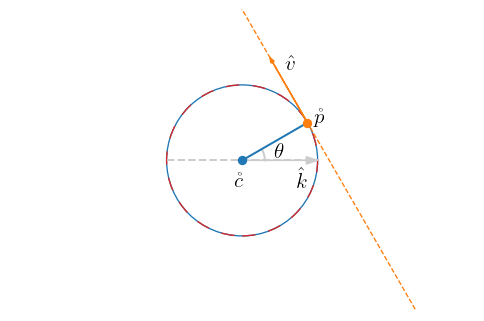

<IPython.core.display.Latex object>

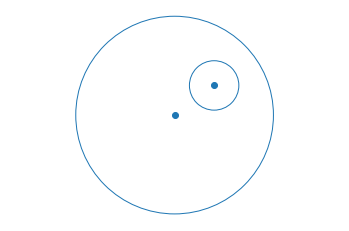

<IPython.core.display.Latex object>

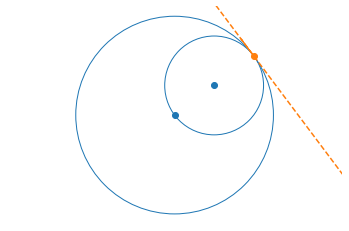

In [125]:
# Calculuation and plot cell

# Clears all variables without confirming
%reset -f   

import numpy as np, scipy as sp, matplotlib.pyplot as plt
from IPython.display import display, Latex
from numpy.linalg import norm
plt.rc('text',usetex=True)

display(Latex(r"""
Degenerate case  
$C_1$ coincides with $C_2$  $\implies$  $(0=D_c)<(r_1=r_2)$.  
  
As such, notate the center, radius, and circle as simply $\mathring{c},\: r,\: C$, respectively.  
Take $\hat{k}$ to be some unit vector, and $\theta$ to be some angle,  
with $\hat{k}$ as reference, to indicate $\mathring{p} \in C$  
$\mathcal{L}=\{         \left(\mathring{p},\hat{v}\right) = \left(\; \mathring{c} + r \hat{k} \angle \theta,\;\;  \hat{k} \angle (\theta+90°) \;\right)         \}$

"""))
# Geometric parameters
c1=np.array([0,0]); r1=1                            # Circle 1 definition
C1=plt.Circle(c1,r1, fill=False, color='tab:blue')
c2=np.array([0,0]); r2=1                            # Circle 2 definition
C2=plt.Circle(c2,r2, fill=False, color='tab:red',linestyle=(0, (10, 10)))
ang=30*np.pi/180                                    # Radius display angle
angles=np.arange(0,ang,np.pi/180,dtype=float)               
p=np.array([np.cos(ang),np.sin(ang)]*r1)+c1[1]      # Radius line / circle intersection point
v=np.array([-p[1],p[0]])


# Figure setup
figd, axd = plt.subplots(figsize=(600/96, 400/96), dpi=96); 
axd.axis('equal'); axd.set_xlim([-2,2]); axd.set_ylim([-2,2])
axd.spines['top'].set_visible(False)
axd.spines['right'].set_visible(False)
axd.spines['bottom'].set_visible(False)
axd.spines['left'].set_visible(False)
axd.get_xaxis().set_ticks([])
axd.get_yaxis().set_ticks([])

# Drawings                                              
axd.plot([c1[0]-r1,c1[0]+r1],[c1[1],c1[1]],                             # Angle reference line
        linestyle='--',color=(0.8,0.8,0.8))              
axd.arrow(c1[0],c1[1],1,0,                                              # k
        head_width=0.1,color=(0.8,0.8,0.8),             
        length_includes_head=True)                       
axd.annotate(r'$ \hat{k} $', xy=[0.8,-0.15],                            # k label
        xycoords='data', fontsize=16, 
        ha ='center', va='top')             

axd.plot(np.cos(angles)*r1*0.3+c1[0], np.sin(angles)*r1*0.3+c1[1],      # Angle indicator arc
        color=(0.8,0.8,0.8))                             
aux=np.array([np.cos(ang/2),np.sin(ang/2)])*r1*0.5+c1[1]        
axd.annotate(r'$ \theta $', xy=aux, xycoords='data',                    # Angle label
        fontsize=16, ha ='center', va='center_baseline')

axd.plot([c1[0],p[0]],[c1[1],p[1]],color='tab:blue')                    # Radius line
axd.add_patch(C1)                                                       # C1
axd.add_patch(C2)                                                       # C2
axd.plot(c1[0],c1[1],'o',color='tab:blue')                              # Center point
axd.annotate(r'$ \mathring{c} $', xy=c1+[0,-0.15],                      # Center label        
        xycoords='data', fontsize=16, 
        ha ='center', va='top')             

axd.plot(p[0],p[1],'o',color='tab:orange')                              # p
axd.annotate(r'$ \mathring{p} $',                                       # p label
        xy=p+np.array([np.cos(ang),np.sin(ang)])*0.2,                          
        xycoords='data', fontsize=16, 
        ha ='center', va='center_baseline')             
axd.arrow(p[0],p[1],v[0],v[1],                                          # v
        head_width=0.05,color='tab:orange',
        length_includes_head=True)                      
axd.annotate(r'$ \hat{v} $',                                            # v label
        xy=p+0.8*v+np.array([np.cos(ang),np.sin(ang)])*0.2,                          
        xycoords='data', fontsize=16, 
        ha ='center', va='center_baseline')             
axd.plot([p[0]+5*v[0],p[0]-5*v[0]],                                     # Tangent line
        [p[1]+5*v[1],p[1]-5*v[1]],
        color='tab:orange',linestyle='--',linewidth=1)               

plt.show(figd)


display(Latex(r"""
Case 0:   
One circle inside the other, no intersections $\implies$ $0<D_c<|r_2-r_1|$.  
  
No lines tangent to one circle can be tangent to the other.
"""))
# Geometric parameters
c1=np.array([4,3]); r1=5                            # Circle 1 definition
C1=plt.Circle(c1,r1, fill=False, color='tab:blue')
c2=np.array([6,9/2]); r2=5/4                        # Circle 2 definition
C2=plt.Circle(c2,r2, fill=False, color='tab:blue')


# Figure setup

fig0, ax0 = plt.subplots(); ax0.axis('equal')
ax0.set_xlim(c1[0]+[-r1*1.1,r1*1.1]); ax0.set_ylim(c1[1]+[-r1*1.1,r1*1.1])
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])

# Drawings
ax0.add_patch(C1)                                        # Circle
ax0.plot(c1[0],c1[1],'o',color='tab:blue')               # Centerpoint
ax0.add_patch(C2)                                        # Circle
ax0.plot(c2[0],c2[1],'o',color='tab:blue')               # Centerpoint

plt.show(fig0)


display(Latex(r"""
Case 1:   
One circle inside the other, one intersection $\implies$ $0<D_c=|r_2-r_1|$  
"""))
# Geometric parameters
c1=np.array([4,3]); r1=5                            # Circle 1 definition
C1=plt.Circle(c1,r1, fill=False, color='tab:blue')
c2=np.array([6,9/2]); r2=5/2                        # Circle 2 definition
C2=plt.Circle(c2,r2, fill=False, color='tab:blue')

"""Calculate the tangent line
If r1>r2, P will be on the positive side of u.
Conversely, if r1<r2, P will be on the negative side of u
"""
u=(c2-c1)/norm(c2-c1)
if r1>r2: P=c1+u*r1
else: P=c2-u*r2
V=[-u[1],u[0]]                                            


# Figure setup
fig1, ax1 = plt.subplots(); ax1.axis('equal')
if r1>r2: 
        ax1.set_xlim(c1[0]+[-r1*1.1,r1*1.1]); ax1.set_ylim(c1[1]+[-r1*1.1,r1*1.1])
else:
        ax1.set_xlim(c2[0]+[-r2*1.1,r2*1.1]); ax1.set_ylim(c2[1]+[-r2*1.1,r2*1.1])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

# Drawings
ax1.add_patch(C1)                                        # Circle
ax1.plot(c1[0],c1[1],'o',color='tab:blue')               # Centerpoint
ax1.add_patch(C2)                                        # Circle
ax1.plot(c2[0],c2[1],'o',color='tab:blue')               # Centerpoint
ax1.plot(P[0],P[1],'o',color='tab:orange')               # P
ax1.arrow(P[0],P[1],V[0],V[1],
        head_width=0.05,color='tab:orange')              # V
ax1.plot([P[0]+10*V[0],P[0]-10*V[0]],
        [P[1]+10*V[1],P[1]-10*V[1]],
        color='tab:orange',linestyle='--')               # Tangent line

plt.show(fig1)
